# Clustering usando algoritmos particionales

<p><strong>Objetivo: </strong> El objetivo de este cuaderno es aplicar el algoritmo de clustering a un conjunto de datos e interpretar los resultados: </p>

<h2>Clustering</h2>

<h2>Indice</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
  <li>Cargar los Datos</li>
  <li>Preparar los datos</li>
  <li>Aplicar el algoritmo</li>
  <li>Determinar el valor de K</li>
</ul>

Tiempo estimado: <strong>30 min</strong>

</div>
<hr>

##Cargar los datos

Para este ejercicio se estará utilizando el conjunto de datos AdventureWorks. Es un conjunto de datos de clientes, compradores de bicicletas. Se desea conocer más sobre estos clientes para realizar estrategias de mercado:

<ul>
  <li>descripción de los datos: <a href="https://www.dropbox.com/s/3skzjs5uqc8zx9p/DiccAW.docx?dl=1" target="_blank">https://www.dropbox.com/s/3skzjs5uqc8zx9p/DiccAW.docx?dl=1</a></li>
  <li>tipo de datos: csv</li>
</ul>

Se va a utilizar la librería Pandas de Python para realizar la lectura de archivos. Este archivo ya viene con cabeceras por lo que no es necesario cargarlas. Se cargan los datos y se muestra el resultado:

In [ ]:
import matplotlib.pyplot as plt # Para graficar
# Importar libreria requerida
import pandas as pd

In [ ]:
# Leer datos desde archivo CSV
csv_path = "https://www.dropbox.com/s/rr4rwedaylm9q41/AdventureWorksEng.csv?dl=1"
df = pd.read_csv(csv_path,sep=",")

df.head()

,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,SpanishEducation,SpanishOccupation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Region,Age,BikeBuyer,CustomerKey
0,M,M,90000,2,0,Licenciatura,Profesional,1,0,1-2 Miles,Pacific,49,1,11000
1,S,M,60000,3,3,Licenciatura,Profesional,0,1,0-1 Miles,Pacific,49,1,11001
2,M,M,60000,3,3,Licenciatura,Profesional,1,1,2-5 Miles,Pacific,49,1,11002
3,S,F,70000,0,0,Licenciatura,Profesional,0,1,5-10 Miles,Pacific,47,1,11003
4,S,F,80000,5,5,Licenciatura,Profesional,1,4,1-2 Miles,Pacific,46,1,11004


##Preparando los datos

Se va a realizar una copia del dataframe original <b>df</b>, para no modificar los datos originales, y se van a realizar todas las transformaciones en <b>cluster_df</b>:

In [ ]:
cluster_df = df.copy()
cluster_df.head()

,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,SpanishEducation,SpanishOccupation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Region,Age,BikeBuyer,CustomerKey
0,M,M,90000,2,0,Licenciatura,Profesional,1,0,1-2 Miles,Pacific,49,1,11000
1,S,M,60000,3,3,Licenciatura,Profesional,0,1,0-1 Miles,Pacific,49,1,11001
2,M,M,60000,3,3,Licenciatura,Profesional,1,1,2-5 Miles,Pacific,49,1,11002
3,S,F,70000,0,0,Licenciatura,Profesional,0,1,5-10 Miles,Pacific,47,1,11003
4,S,F,80000,5,5,Licenciatura,Profesional,1,4,1-2 Miles,Pacific,46,1,11004


La columna <b>CustomerKey</b> tiene todos los valores diferentes por lo que no debe entrar al algoritmo. La columna <b>Region</b> solo posee dos valores, por lo que no aportará mucho a la asignación de clusters, es mejor eliminarla:

In [ ]:
cluster_df.drop("CustomerKey", axis=1, inplace=True)
cluster_df.drop("Region", axis=1, inplace=True)

Como el algoritmo solo acepta datos numéricos, es necesario Numerizar aquellas columnas que sean categóricas.
<p>Las columnas <b>MaritalStatus</b> y <b>Gender</b> se pueden numerizar de 1 a 1, sustituyendo por 0 y 1 sus valores.</p>
<p>Las columnas <b>SpanishEducation</b>, <b>SpanishOccupation</b> y <b>CommuteDistance</b> se deben numerizar de 1 a n pues no son ordinales.</p>

In [ ]:
cluster_df["CommuteDistance"].value_counts()

0-1 Miles     6310
2-5 Miles     3234
1-2 Miles     3232
5-10 Miles    3214
10+ Miles     2494
Name: CommuteDistance, dtype: int64

In [ ]:

cluster_df["SpanishEducation"].value_counts()

Licenciatura                          5356
Estudios universitarios (en curso)    5064
Educación secundaria                  3294
Estudios de postgrado                 3189
Educación secundaria (en curso)       1581
Name: SpanishEducation, dtype: int64

In [ ]:
cluster_df["SpanishOccupation"].value_counts()

Profesional             5520
Obrero especializado    4577
Gestión                 3075
Administrativo          2928
Obrero                  2384
Name: SpanishOccupation, dtype: int64

In [ ]:
from sklearn import preprocessing #Importa funciones para el procesamiento de los datos
#Numerizacion 1 a 1
le_DT = preprocessing.LabelEncoder()
le_DT.fit(['0-1 Miles', '1-2 Miles','2-5 Miles','5-10 Miles','10+ Miles'])
cluster_df.CommuteDistance= le_DT.transform(cluster_df.CommuteDistance)

le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
cluster_df.Gender= le_sex.transform(cluster_df.Gender)

le_EC = preprocessing.LabelEncoder()
le_EC.fit([ 'M', 'S'])
cluster_df.MaritalStatus= le_EC.transform(cluster_df.MaritalStatus)

le_Edu = preprocessing.LabelEncoder()
le_Edu.fit(['Educación secundaria (en curso)', 'Educación secundaria', 'Estudios universitarios (en curso)','Licenciatura','Estudios de postgrado'])
cluster_df.SpanishEducation = le_Edu.transform(cluster_df.SpanishEducation)

In [ ]:
#Numerizacion 1 a n
cluster_df = pd.get_dummies(cluster_df, columns = ["SpanishOccupation"])


In [ ]:
# Al hacer numerización 1 a n es importante eliminar una de las columnas generadas para evitar las relaciones de correlación entre ellas
# Se suele eliminar el menos usado (el que tiene menos registros positivos)
cluster_df.drop("SpanishOccupation_Obrero", axis=1, inplace=True)

In [ ]:
cluster_df.head()

,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,SpanishEducation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Age,BikeBuyer,SpanishOccupation_Administrativo,SpanishOccupation_Gestión,SpanishOccupation_Obrero especializado,SpanishOccupation_Profesional
0,0,1,90000,2,0,4,1,0,1,49,1,0,0,0,1
1,1,1,60000,3,3,4,0,1,0,49,1,0,0,0,1
2,0,1,60000,3,3,4,1,1,3,49,1,0,0,0,1
3,1,0,70000,0,0,4,0,1,4,47,1,0,0,0,1
4,1,0,80000,5,5,4,1,4,1,46,1,0,0,0,1


In [ ]:
# Guardaremos los datos numerizados para futuros experimentos
df_numerizado = cluster_df.copy()

La técnica de clustering es una técnica basada en distancias, por lo que es muy importante realizar la <b>Normalización</b> de todas las variables. Se aplicará la normalización MinMax:

In [ ]:
from sklearn.preprocessing import MinMaxScaler # Importa métodos para normalizar usando minMax
# Realizaremos normalización MIN-MAX para que todos los atributos queden entre 0 y 1. Puedes modificar el rango.
min_max_scaler = MinMaxScaler()
cluster_df[:] = min_max_scaler.fit_transform(cluster_df)

In [ ]:
# Guardaremos la vista minable para posteriormente hacer experimentos
df_numerizado_normalizadoMinMax = cluster_df.copy()
cluster_df # La visa minable que será usada: Numerizada, normalizada

,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,SpanishEducation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Age,BikeBuyer,SpanishOccupation_Administrativo,SpanishOccupation_Gestión,SpanishOccupation_Obrero especializado,SpanishOccupation_Profesional
0,0.0,1.0,0.5000,0.4,0.0,1.0,1.0,0.00,0.25,0.214286,1.0,0.0,0.0,0.0,1.0
1,1.0,1.0,0.3125,0.6,0.6,1.0,0.0,0.25,0.00,0.214286,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.3125,0.6,0.6,1.0,1.0,0.25,0.75,0.214286,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.3750,0.0,0.0,1.0,0.0,0.25,1.00,0.185714,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.4375,1.0,1.0,1.0,1.0,1.00,0.25,0.171429,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18479,0.0,1.0,0.1250,0.2,0.0,0.5,1.0,0.00,0.00,0.314286,1.0,1.0,0.0,0.0,0.0
18480,1.0,0.0,0.1250,0.6,0.0,0.5,1.0,0.00,0.00,0.285714,1.0,1.0,0.0,0.0,0.0
18481,1.0,1.0,0.1250,0.6,0.0,0.5,0.0,0.00,0.00,0.300000,1.0,1.0,0.0,0.0,0.0
18482,0.0,1.0,0.1250,0.6,0.0,1.0,1.0,0.00,0.00,0.314286,1.0,1.0,0.0,0.0,0.0


##Aplicando el algoritmo

Se configura el algoritmo para ejecutarse utilizando 

In [ ]:
from sklearn.cluster import KMeans
clusterer = KMeans(init = "k-means++", n_clusters = 6, n_init = 12, max_iter=500, random_state=1)

Se aplica el algoritmo k-medias al conjunto de datos:

In [ ]:
cluster_labels = clusterer.fit_predict(cluster_df)

Se asignan las etiquetas al conjunto de datos:

In [ ]:
cluster_df["Cluster"] = cluster_labels
cluster_df.tail(10)

,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,SpanishEducation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Age,BikeBuyer,SpanishOccupation_Administrativo,SpanishOccupation_Gestión,SpanishOccupation_Obrero especializado,SpanishOccupation_Profesional,Cluster
18474,0.0,1.0,0.0625,0.4,0.0,0.75,0.0,0.25,0.00,0.300000,1.0,0.0,0.0,0.0,0.0,3
18475,1.0,1.0,0.0625,0.4,0.0,0.75,0.0,0.25,0.75,0.300000,1.0,0.0,0.0,0.0,0.0,3
18476,0.0,0.0,0.0625,0.4,0.0,0.75,0.0,0.25,0.00,0.300000,1.0,0.0,0.0,0.0,0.0,3
18477,0.0,1.0,0.0625,0.4,0.0,0.75,0.0,0.25,0.25,0.300000,1.0,0.0,0.0,0.0,0.0,3
18478,1.0,1.0,0.1250,0.6,0.0,0.50,1.0,0.00,0.00,0.300000,1.0,1.0,0.0,0.0,0.0,4
18479,0.0,1.0,0.1250,0.2,0.0,0.50,1.0,0.00,0.00,0.314286,1.0,1.0,0.0,0.0,0.0,4
18480,1.0,0.0,0.1250,0.6,0.0,0.50,1.0,0.00,0.00,0.285714,1.0,1.0,0.0,0.0,0.0,4
18481,1.0,1.0,0.1250,0.6,0.0,0.50,0.0,0.00,0.00,0.300000,1.0,1.0,0.0,0.0,0.0,4
18482,0.0,1.0,0.1250,0.6,0.0,1.00,1.0,0.00,0.00,0.314286,1.0,1.0,0.0,0.0,0.0,4
18483,0.0,1.0,0.1250,0.0,0.0,1.00,1.0,0.00,0.00,0.300000,1.0,1.0,0.0,0.0,0.0,4


Revise el valor de los centroides para evaluar que atributo tuvo más peso en cada cluster:

In [ ]:
centroides = cluster_df.groupby('Cluster').mean()

In [ ]:
centroides

,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,SpanishEducation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Age,BikeBuyer,SpanishOccupation_Administrativo,SpanishOccupation_Gestión,SpanishOccupation_Obrero especializado,SpanishOccupation_Profesional
Cluster,,,,,,,,,,,,,,,
0,0.231754,0.519668,0.228332,0.314171,0.125166,0.563211,0.914455,0.295853,0.497038,0.230139,0.474645,0.000000,0.000000,0.870853,0.000000
1,0.000000,0.511954,0.408232,0.516672,0.340070,0.607109,0.796302,0.446047,0.526140,0.290746,0.434810,0.000000,0.000000,0.000000,0.996493
2,1.000000,0.469925,0.390142,0.352966,0.209858,0.707707,0.504177,0.431078,0.546784,0.257650,0.586884,0.000000,0.000000,0.000000,1.000000
3,0.912376,0.497443,0.127259,0.214797,0.111763,0.368565,0.239004,0.319724,0.232867,0.179899,0.456188,0.050801,0.019775,0.307535,0.000000
4,0.480776,0.502336,0.130031,0.292778,0.119368,0.692149,0.710744,0.214517,0.210205,0.259401,0.590370,0.998563,0.000000,0.000000,0.000000
5,0.360292,0.520384,0.514315,0.524296,0.316341,0.716274,0.748757,0.573252,0.453928,0.395710,0.457077,0.000000,1.000000,0.000000,0.000000


In [ ]:
# Calcularemos la traspuesta para graficar
centroids_transposed = centroides.T 
centroids_transposed

Cluster,0,1,2,3,4,5
MaritalStatus,0.231754,0.000000,1.000000,0.912376,0.480776,0.360292
Gender,0.519668,0.511954,0.469925,0.497443,0.502336,0.520384
YearlyIncome,0.228332,0.408232,0.390142,0.127259,0.130031,0.514315
TotalChildren,0.314171,0.516672,0.352966,0.214797,0.292778,0.524296
NumberChildrenAtHome,0.125166,0.340070,0.209858,0.111763,0.119368,0.316341
SpanishEducation,0.563211,0.607109,0.707707,0.368565,0.692149,0.716274
HouseOwnerFlag,0.914455,0.796302,0.504177,0.239004,0.710744,0.748757
NumberCarsOwned,0.295853,0.446047,0.431078,0.319724,0.214517,0.573252
CommuteDistance,0.497038,0.526140,0.546784,0.232867,0.210205,0.453928
Age,0.230139,0.290746,0.257650,0.179899,0.259401,0.395710


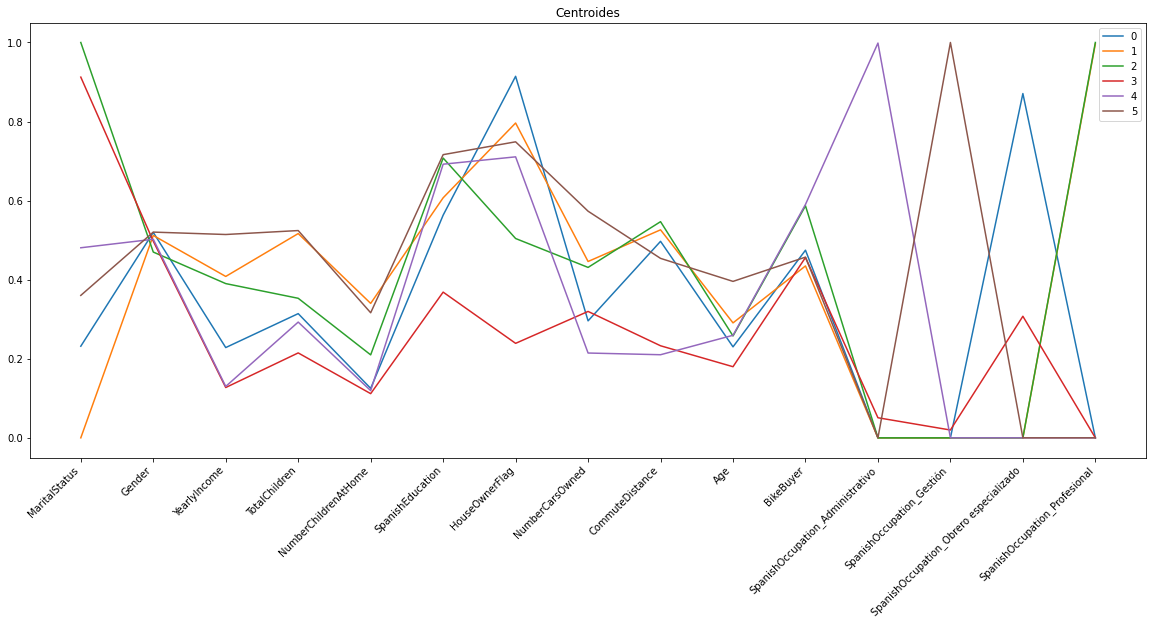

In [ ]:
import matplotlib.pyplot as plt # Para graficar
plt.figure(figsize=(20, 8))
plt.plot(centroids_transposed, label='Line '+ centroids_transposed.index)
plt.xticks(rotation=45, ha='right')
plt.title("Centroides")
plt.legend(centroids_transposed.columns)
plt.show()

# Ahora tú

Describe el cluster 1

Para conocer el número de elementos en cada cluster:

In [ ]:
cluster_df["Cluster"].value_counts()


0    4220
1    3137
5    3017
3    2933
4    2783
2    2394
Name: Cluster, dtype: int64

Para visualizar los datos y ver los distintos clusters creados se utiliza la librería Seaborn. Se visualizan los atributos <b>YearlyIncome</b> y <b>Age</b>:

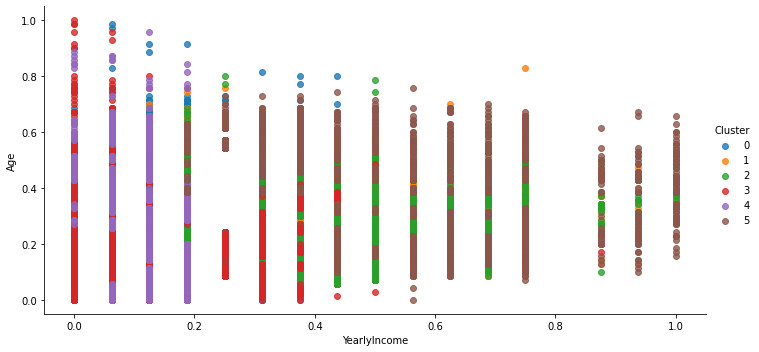

In [ ]:
import seaborn as sns
sns.lmplot(x='YearlyIncome',y='Age',data = cluster_df,hue = 'Cluster', fit_reg = False, height = 5, aspect = 2)

##Determinar el valor de K

Para evaluar la calidad de los clusters, se pueden aplicar diferentes estrategias. A continuación se generan diferentes ejecuciones del algoritmo, variando la K y se calcula el error cuadrático para cada K y se grafica con el objetivo de encontrar la mejor K:

In [ ]:
kmeans_k = {"init": "k-means++", "n_init": 12, "max_iter": 500}
# Lista que obtiene los SSE para cada valor de k
sse = []
for k in range(2, 15):
  clusterer = KMeans(n_clusters=k, **kmeans_k)
  cluster_labels = clusterer.fit_predict(cluster_df)
  sse.append(clusterer.inertia_)

Se visualizan las diferentes K, con los errores obtenidos:

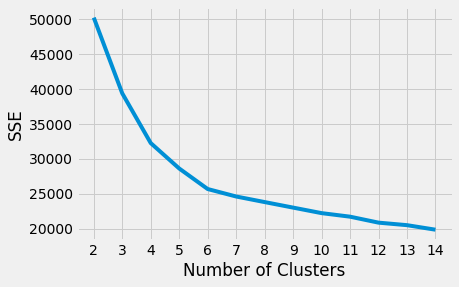

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 15), sse)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

##Calcular el coeficiente de Silhoutte

Para un cálculo rápido del coeficiente total se puede utilizar el siguiente código:

In [ ]:
#k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12, max_iter=500, random_state=1)
clusterer = KMeans(n_clusters = 4, init='k-means++', n_init=10, max_iter=500, random_state=42)
cluster_labels = clusterer.fit_predict(cluster_df)

In [ ]:
from sklearn.metrics import silhouette_score
df1 = cluster_df.copy() # copia del dataframe para eliminar la columna Cluster
df1.drop(['Cluster'], axis = 'columns', inplace = True) # Se elimina la columna Cluster
silhouette_avg = silhouette_score(df1, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.173343913831578


In [ ]:
kmeans_k = {"init": "k-means++", "n_init": 12, "max_iter": 500}
# Lista que obtiene los SSE para cada valor de k
sil = []
for k in range(2, 15):
  clusterer = KMeans(n_clusters = k, **kmeans_k)
  cluster_labels = clusterer.fit_predict(df1)
  silhouette_avg = silhouette_score(df1, cluster_labels)
  print("Para n_clusters =",k,"El promedio de silhouette_score es :",silhouette_avg)


Para n_clusters = 2 El promedio de silhouette_score es : 0.12655863096992934
Para n_clusters = 3 El promedio de silhouette_score es : 0.17147856974737127
Para n_clusters = 4 El promedio de silhouette_score es : 0.1918355001767809
Para n_clusters = 5 El promedio de silhouette_score es : 0.17916011290855932
Para n_clusters = 6 El promedio de silhouette_score es : 0.17817374645852452
Para n_clusters = 7 El promedio de silhouette_score es : 0.16661929083846636
Para n_clusters = 8 El promedio de silhouette_score es : 0.1656829238897244
Para n_clusters = 9 El promedio de silhouette_score es : 0.1657371651892178
Para n_clusters = 10 El promedio de silhouette_score es : 0.1677733976271634
Para n_clusters = 11 El promedio de silhouette_score es : 0.17609952182584496
Para n_clusters = 12 El promedio de silhouette_score es : 0.1627010995180713
Para n_clusters = 13 El promedio de silhouette_score es : 0.17637627961944316
Para n_clusters = 14 El promedio de silhouette_score es : 0.17290408478369693

# Análisis de varios k con silueta

Para calcular varias alternativas y visualizar los resultados, se puede utilizar la librería <b>Yellowbrick</b>:

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f004016df90>,
                     colors='yellowbrick',
                     estimator=KMeans(max_iter=500, n_clusters=6, n_init=12))

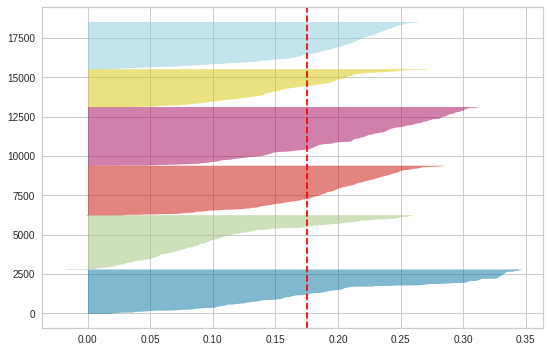

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
kmeans_k = {"init": "k-means++", "n_init": 12, "max_iter": 500}
clusterer = KMeans(n_clusters = 6, **kmeans_k)
cluster_labels = clusterer.fit_predict(df1)
visualizer = SilhouetteVisualizer(clusterer, colors='yellowbrick')
df1 = cluster_df.copy() # copia del dataframe para eliminar la columna Cluster
df1.drop(['Cluster'], axis = 'columns', inplace = True) # Se elimina la columna Cluster
visualizer.fit(df1) # Se visualiza el resultado para una ejecución

Si desea evaluar el resultado con varias alternativas, ejecute el siguiente código:

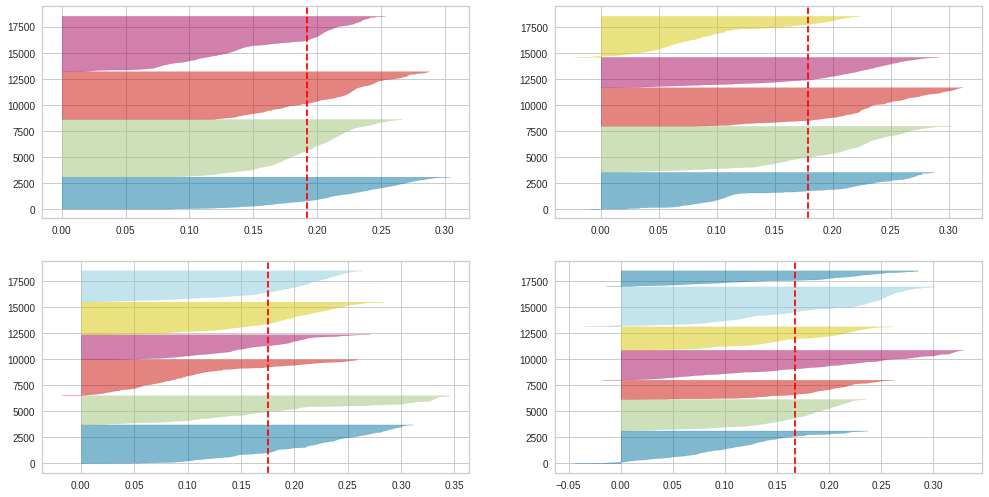

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8)) # se van a visualizar varias gráficas
row=0
for i in [4, 5, 6, 7]: # se va a probar con varios valores de K
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42) # Se configura el modelo con cada K
    q, mod = divmod(i, 2) # Esto es para visualizar los 4 graficos uno al lado del otro
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-2][mod]) # Se crean visualizaciones para cada valor de K
    visualizer.fit(df1)
    row=row+1

## Ahora tú - Taller
Experimenta con el conjunto de datos y aumenta el coeficiente de silueta

Genera e interpreta los clusters que te arrojan mejor coeficiente de silueta. Analiza también el gráfico del codo.

Mínimo 3 experimentos.


# Experimento 2 eliminando atributos

## Preparación de datos

In [ ]:
cluster_df2 = df_numerizado.copy()


In [ ]:
cluster_df2.columns

Index(['MaritalStatus', 'Gender', 'YearlyIncome', 'TotalChildren',
       'NumberChildrenAtHome', 'SpanishEducation', 'HouseOwnerFlag',
       'NumberCarsOwned', 'CommuteDistance', 'Age', 'BikeBuyer',
       'SpanishOccupation_Administrativo', 'SpanishOccupation_Gestión',
       'SpanishOccupation_Obrero especializado',
       'SpanishOccupation_Profesional'],
      dtype='object')

In [ ]:
cluster_df2.drop(columns =['SpanishOccupation_Administrativo', 'SpanishOccupation_Gestión',
       'SpanishOccupation_Obrero especializado',
       'SpanishOccupation_Profesional'], axis=1, inplace=True)


Analizaremos los atípicos univariados.

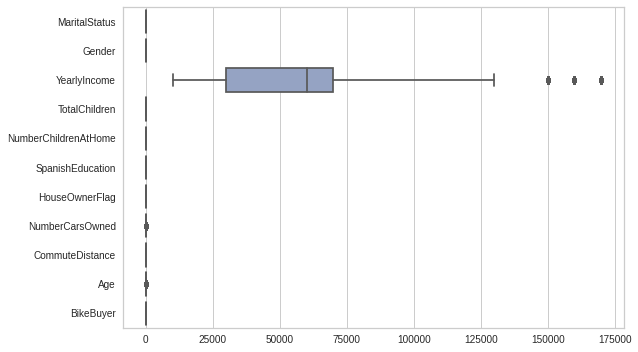

In [ ]:
ax = sns.boxplot(data=cluster_df2, orient="h", palette="Set2")


Ahora graficaremos todos excepto el que está en un rango muy grande

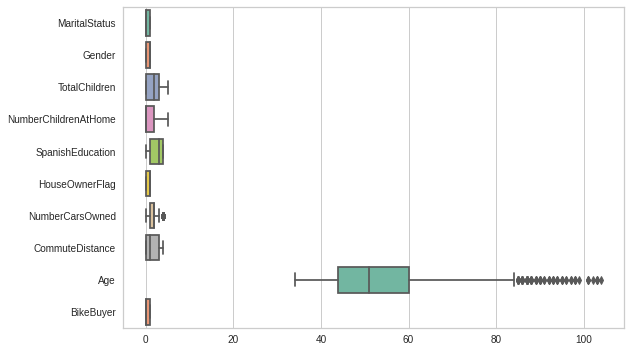

In [ ]:
ax = sns.boxplot(data=cluster_df2.loc[:, cluster_df2.columns != 'YearlyIncome'], orient="h", palette="Set2")


###  Remoción de outliers
Crearemos una función que retorne los límites superiores e inferiores de outliers.

In [ ]:
import numpy as np

def  limitesInconsistente(observaciones):
  # Cuartil 1
  q1 = np.quantile(observaciones, 0.25)
 
  # Cuartil 3
  q3 = np.quantile(observaciones, 0.75)
  med = np.median(observaciones)
  
  # IQR
  iqr = q3-q1
  
  # bigotes
  upper_bound = q3+(1.5*iqr)
  lower_bound = q1-(1.5*iqr)

  print(q1, med, q3, iqr)
  return upper_bound, lower_bound

In [ ]:
upper_bound, lower_bound = limitesInconsistente(cluster_df2['YearlyIncome'])
cluster_df2 = cluster_df2[(cluster_df2["YearlyIncome"] < upper_bound) & (cluster_df2["YearlyIncome"] > lower_bound)]

30000.0 60000.0 70000.0 40000.0


In [ ]:
upper_bound, lower_bound

(130000.0, -30000.0)

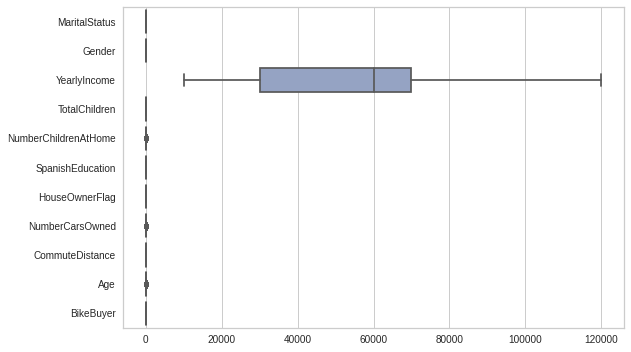

In [ ]:
ax = sns.boxplot(data=cluster_df2, orient="h", palette="Set2")


In [ ]:
upper_bound, lower_bound = limitesInconsistente(cluster_df2['Age'])
cluster_df2 = cluster_df2[(cluster_df2["Age"] < upper_bound) & (cluster_df2["Age"] > lower_bound)]

44.0 51.0 60.0 16.0


In [ ]:
upper_bound, lower_bound

(84.0, 20.0)

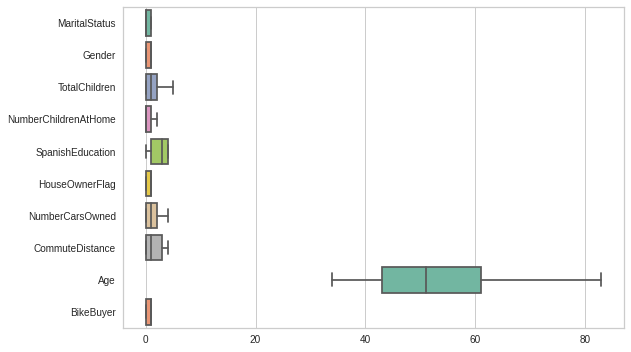

In [ ]:
ax = sns.boxplot(data=cluster_df2.loc[:, cluster_df2.columns != 'YearlyIncome'], orient="h", palette="Set2")


In [ ]:
upper_bound, lower_bound = limitesInconsistente(cluster_df2['NumberChildrenAtHome'])
cluster_df2 = cluster_df2[(cluster_df2["NumberChildrenAtHome"] < upper_bound) & (cluster_df2["NumberChildrenAtHome"] > lower_bound)]

0.0 0.0 1.0 1.0


In [ ]:
upper_bound, lower_bound

(2.5, -1.5)

In [ ]:
upper_bound, lower_bound = limitesInconsistente(cluster_df2['NumberCarsOwned'])
cluster_df2 = cluster_df2[(cluster_df2["NumberCarsOwned"] < upper_bound) & (cluster_df2["NumberCarsOwned"] > lower_bound)]

0.0 1.0 2.0 2.0


In [ ]:
upper_bound, lower_bound

(5.0, -3.0)

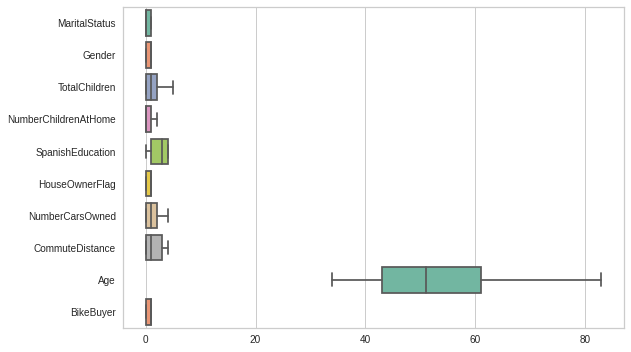

In [ ]:
ax = sns.boxplot(data=cluster_df2.loc[:, cluster_df2.columns != 'YearlyIncome'], orient="h", palette="Set2")


###  Normalización

In [ ]:
min_max_scaler = MinMaxScaler()
cluster_df2[:] = min_max_scaler.fit_transform(cluster_df2)

## Aplicación del algoritmo

In [ ]:
clusterer = KMeans(init = "k-means++", n_clusters = 8, n_init = 12, max_iter=500, random_state=1)

In [ ]:
cluster_labels = clusterer.fit_predict(cluster_df2)

In [ ]:
cluster_df2["Cluster"] = cluster_labels
cluster_df2.head(10)

,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,SpanishEducation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Age,BikeBuyer,Cluster
0,0.0,1.0,0.727273,0.4,0.0,1.00,1.0,0.00,0.25,0.306122,1.0,2
3,1.0,0.0,0.545455,0.0,0.0,1.00,0.0,0.25,1.00,0.265306,1.0,5
5,1.0,1.0,0.545455,0.0,0.0,1.00,1.0,0.25,1.00,0.306122,1.0,1
6,1.0,0.0,0.545455,0.0,0.0,1.00,1.0,0.25,1.00,0.306122,1.0,1
9,1.0,1.0,0.545455,0.0,0.0,1.00,0.0,0.25,1.00,0.346939,1.0,5
10,1.0,0.0,0.545455,0.0,0.0,1.00,0.0,0.25,1.00,0.346939,1.0,5
12,0.0,0.0,0.818182,0.4,0.0,1.00,1.0,0.50,0.25,0.265306,0.0,3
13,0.0,1.0,0.818182,0.4,0.0,1.00,1.0,0.75,0.00,0.244898,0.0,0
14,1.0,0.0,0.818182,0.6,0.0,1.00,0.0,0.75,0.25,0.244898,0.0,4
15,1.0,0.0,0.181818,0.0,0.0,0.75,0.0,0.25,1.00,0.040816,1.0,5


## Análisis de los clusters resultantes

In [ ]:
cluster_df["Cluster"].value_counts()


0    4220
1    3137
5    3017
3    2933
4    2783
2    2394
Name: Cluster, dtype: int64

In [ ]:
centroides = cluster_df2.groupby('Cluster').mean()
centroides

,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,SpanishEducation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Age,BikeBuyer
Cluster,,,,,,,,,,,
0,0.0,1.000000,0.356371,0.378168,0.183480,0.561282,0.774854,0.353314,0.435794,0.455593,0.0
1,1.0,0.485405,0.379459,0.327243,0.258919,0.631351,1.000000,0.272973,0.531486,0.364567,1.0
2,0.0,1.000000,0.388588,0.341651,0.199136,0.672505,0.815739,0.258997,0.390835,0.388842,1.0
3,0.0,0.000000,0.355873,0.379458,0.189844,0.550923,0.803231,0.362233,0.449221,0.460756,0.0
4,1.0,0.498515,0.298169,0.176233,0.085859,0.521687,0.000000,0.379531,0.361854,0.284502,0.0
5,1.0,0.472193,0.364972,0.185624,0.143232,0.641133,0.000000,0.303515,0.261149,0.282288,1.0
6,1.0,0.465635,0.332339,0.339567,0.216409,0.505418,1.000000,0.372136,0.559598,0.381980,0.0
7,0.0,0.000000,0.381224,0.335579,0.193211,0.691041,0.842777,0.248979,0.368811,0.390860,1.0


In [ ]:
# Calcularemos la traspuesta para graficar
centroids_transposed = centroides.T 
centroids_transposed

Cluster,0,1,2,3,4,5,6,7
MaritalStatus,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
Gender,1.000000,0.485405,1.000000,0.000000,0.498515,0.472193,0.465635,0.000000
YearlyIncome,0.356371,0.379459,0.388588,0.355873,0.298169,0.364972,0.332339,0.381224
TotalChildren,0.378168,0.327243,0.341651,0.379458,0.176233,0.185624,0.339567,0.335579
NumberChildrenAtHome,0.183480,0.258919,0.199136,0.189844,0.085859,0.143232,0.216409,0.193211
SpanishEducation,0.561282,0.631351,0.672505,0.550923,0.521687,0.641133,0.505418,0.691041
HouseOwnerFlag,0.774854,1.000000,0.815739,0.803231,0.000000,0.000000,1.000000,0.842777
NumberCarsOwned,0.353314,0.272973,0.258997,0.362233,0.379531,0.303515,0.372136,0.248979
CommuteDistance,0.435794,0.531486,0.390835,0.449221,0.361854,0.261149,0.559598,0.368811
Age,0.455593,0.364567,0.388842,0.460756,0.284502,0.282288,0.381980,0.390860


### Visualización de centroides

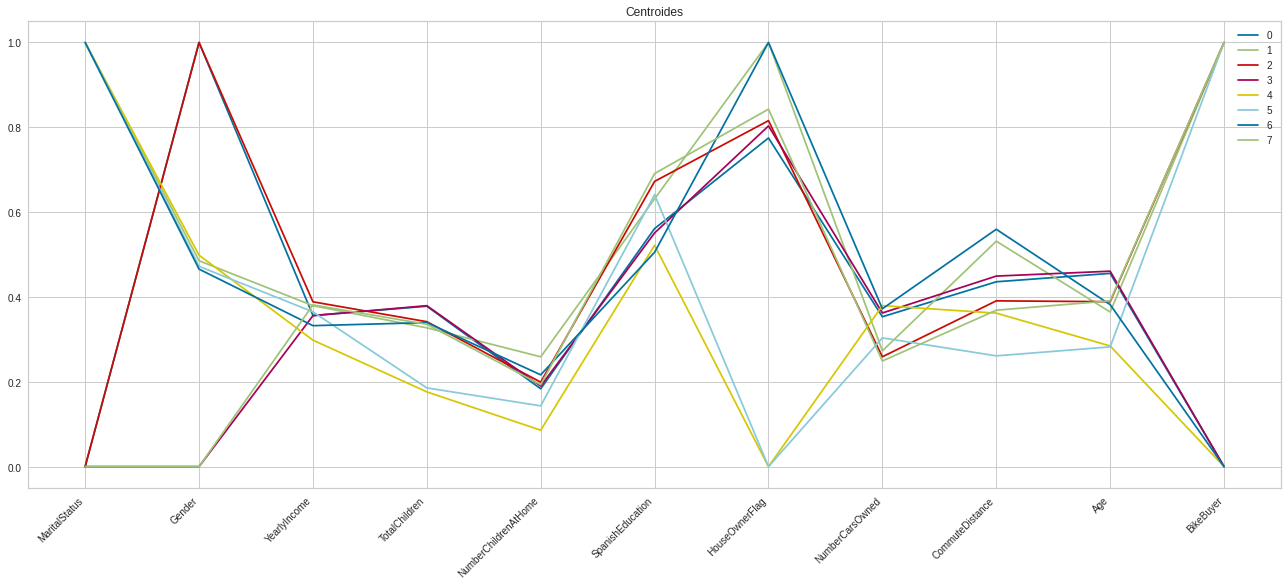

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(centroids_transposed, label='Line '+ centroids_transposed.index)
plt.xticks(rotation=45, ha='right')
plt.title("Centroides")
plt.legend(centroids_transposed.columns)
plt.show()

## Análisis de k con codo y con silueta

In [ ]:
kmeans_k = {"init": "k-means++", "n_init": 12, "max_iter": 500}
# Lista que obtiene los SSE para cada valor de k
sse = []
for k in range(2, 15):
  clusterer = KMeans(n_clusters=k, **kmeans_k)
  cluster_labels = clusterer.fit_predict(cluster_df2)
  sse.append(clusterer.inertia_)

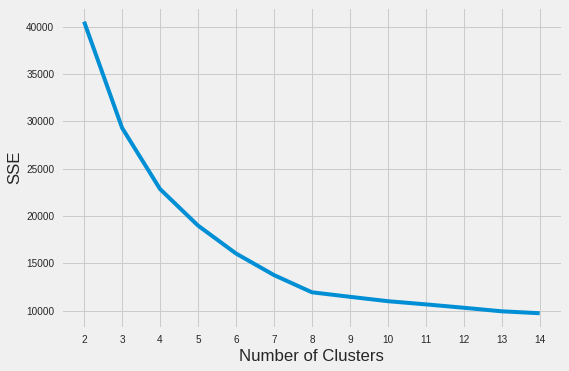

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 15), sse)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
df2 = cluster_df2.copy() # copia del dataframe para eliminar la columna Cluster
df2.drop(['Cluster'], axis = 'columns', inplace = True) # Se elimina la columna Cluster
silhouette_avg = silhouette_score(df2, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.2350531999046642


Links de ayuda interesantes:
<ul>
    <li>Clustering with Scikit-learn: https://scikit-learn.org/stable/modules/clustering.html</li>
    <li>7 ways to label a cluster plot in Python: https://nikkimarinsek.com/blog/7-ways-to-label-a-cluster-plot-python</li> 
<ul>